Enter date (YYYY-MM-DD)2021-09-15


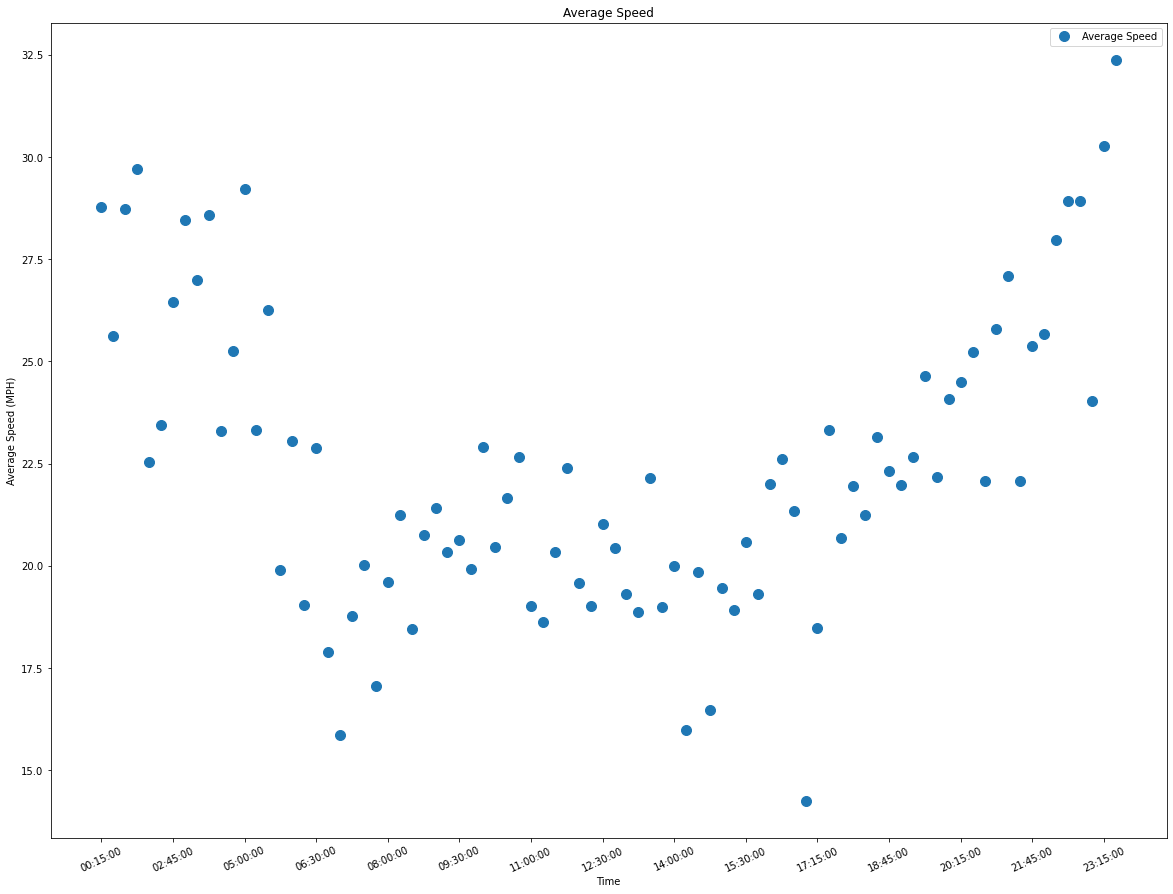

In [1]:
import requests
from passwords import *
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start=input('Enter date (YYYY-MM-DD)')
start = datetime.datetime.strptime(start, '%Y-%m-%d')
end= start+datetime.timedelta(days=1)

url = f'https://www.tfwm.onl/AWS_Analysis.json?ApiKey={key}&earliest={start}&latest={end}'
result = requests.get(url).json()
df = pd.DataFrame(result['AWS_Analysis']['kids'][n]['kids'] for n in result['AWS_Analysis']['kids'])
df['Segment_Speed_MPH']=df['Segment_Speed_MPH'].astype(float)

df['BIN'] = pd.to_datetime(df['BIN'])
df['BIN'] = df['BIN'].dt.strftime('%H:%M:%S')
df=df.loc[df['Segment_Speed_MPH'] < 100]
df_new = df.loc[df['Segment_ID'] == '3 - Perry Barr to Great Barr North - NB']

plt.plot(df_new['BIN'],df_new['Segment_Speed_MPH'],'o',markersize=10,label='Average Speed')
plt.xlabel('Time')
plt.xticks(rotation = '25')
plt.ylabel('Average Speed (MPH)')
plt.title(f'Average Speed')
plt.legend()
fig = plt.gcf()
plt.rcParams.update({'font.size': 15})
fig.set_size_inches(20, 15)
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::6])
plt.show()